# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

## Attaching Resources

### Importing Necessary Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS

### Adding Dataset

In [2]:
em = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_11_Text%20Mining/Dataset/Elon_musk.csv',encoding='Latin-1')
em.drop(columns = 'Unnamed: 0', inplace = True)

em

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Performing EDA In Dataset

### Performing Text Cleaning

In [3]:
corpus = []

for i in range(len(em['Text'])):
    txt = re.sub('[^a-zA-Z]',' ',em['Text'][i])
    txt = txt.lower()
    corpus.append(txt)

In [4]:
corpus

[' kunalb   i m an alien',
 ' id aa carmack ray tracing on cyberpunk with hdr is next level  have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated',
 ' teslacn congratulations tesla china for amazing execution last year  now on to the next for even more  ',
 'happy new year of the ox  https   t co  wfkmyu oj',
 'frodo was the underdoge  all thought he would fail  himself most of all  https   t co zgxjfdzzrm',
 ' owensparks   flcnhvy  anonyx   haha thanks   ',
 ' flcnhvy  anonyx   indeed  tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely',
 ' givedirectly just sent some',
 'just agree to do clubhouse with  kanyewest',
 'https   t co  rwe uhsts',
 ' geoffkeighley  unrealengine it s getting real',
 'bought some dogecoin for lil x  so he can be a toddler hodler',
 ' joshmanmode he definitely has issues  but the sentencing seems a bit high',
 ' freewalletorg thanks for fixing',
 ' free

### Applying Lemmatization And Word Tokenize

In [5]:
lemma = WordNetLemmatizer()

for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i))

kunalb
alien
id
aa
carmack
ray
tracing
cyberpunk
hdr
next
level
tried
joerogan
spotify
great
interview
gtera
doge
underestimated
teslacn
congratulation
tesla
china
amazing
execution
last
year
next
even
happy
new
year
ox
http
co
wfkmyu
oj
frodo
underdoge
thought
would
fail
http
co
zgxjfdzzrm
owensparks
flcnhvy
anonyx
haha
thanks
flcnhvy
anonyx
indeed
tweet
definitely
represent
real
world
time
allocation
entertaining
outcome
likely
givedirectly
sent
agree
clubhouse
kanyewest
http
co
rwe
uhsts
geoffkeighley
unrealengine
getting
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmode
definitely
issue
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
u
f
u
f
true
power
haha
http
co
fc
uhqsd
freewalletorg
crypto
wallet
give
private
key
avoided
cost
freewalletorg
app
suck
rt
spacex
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
http
co
pwt
ajtourville
yes
blkmdl
rationaletienne
adamklotz
predict
cash
flow

## Creating Word Cloud

In [25]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS
    
    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

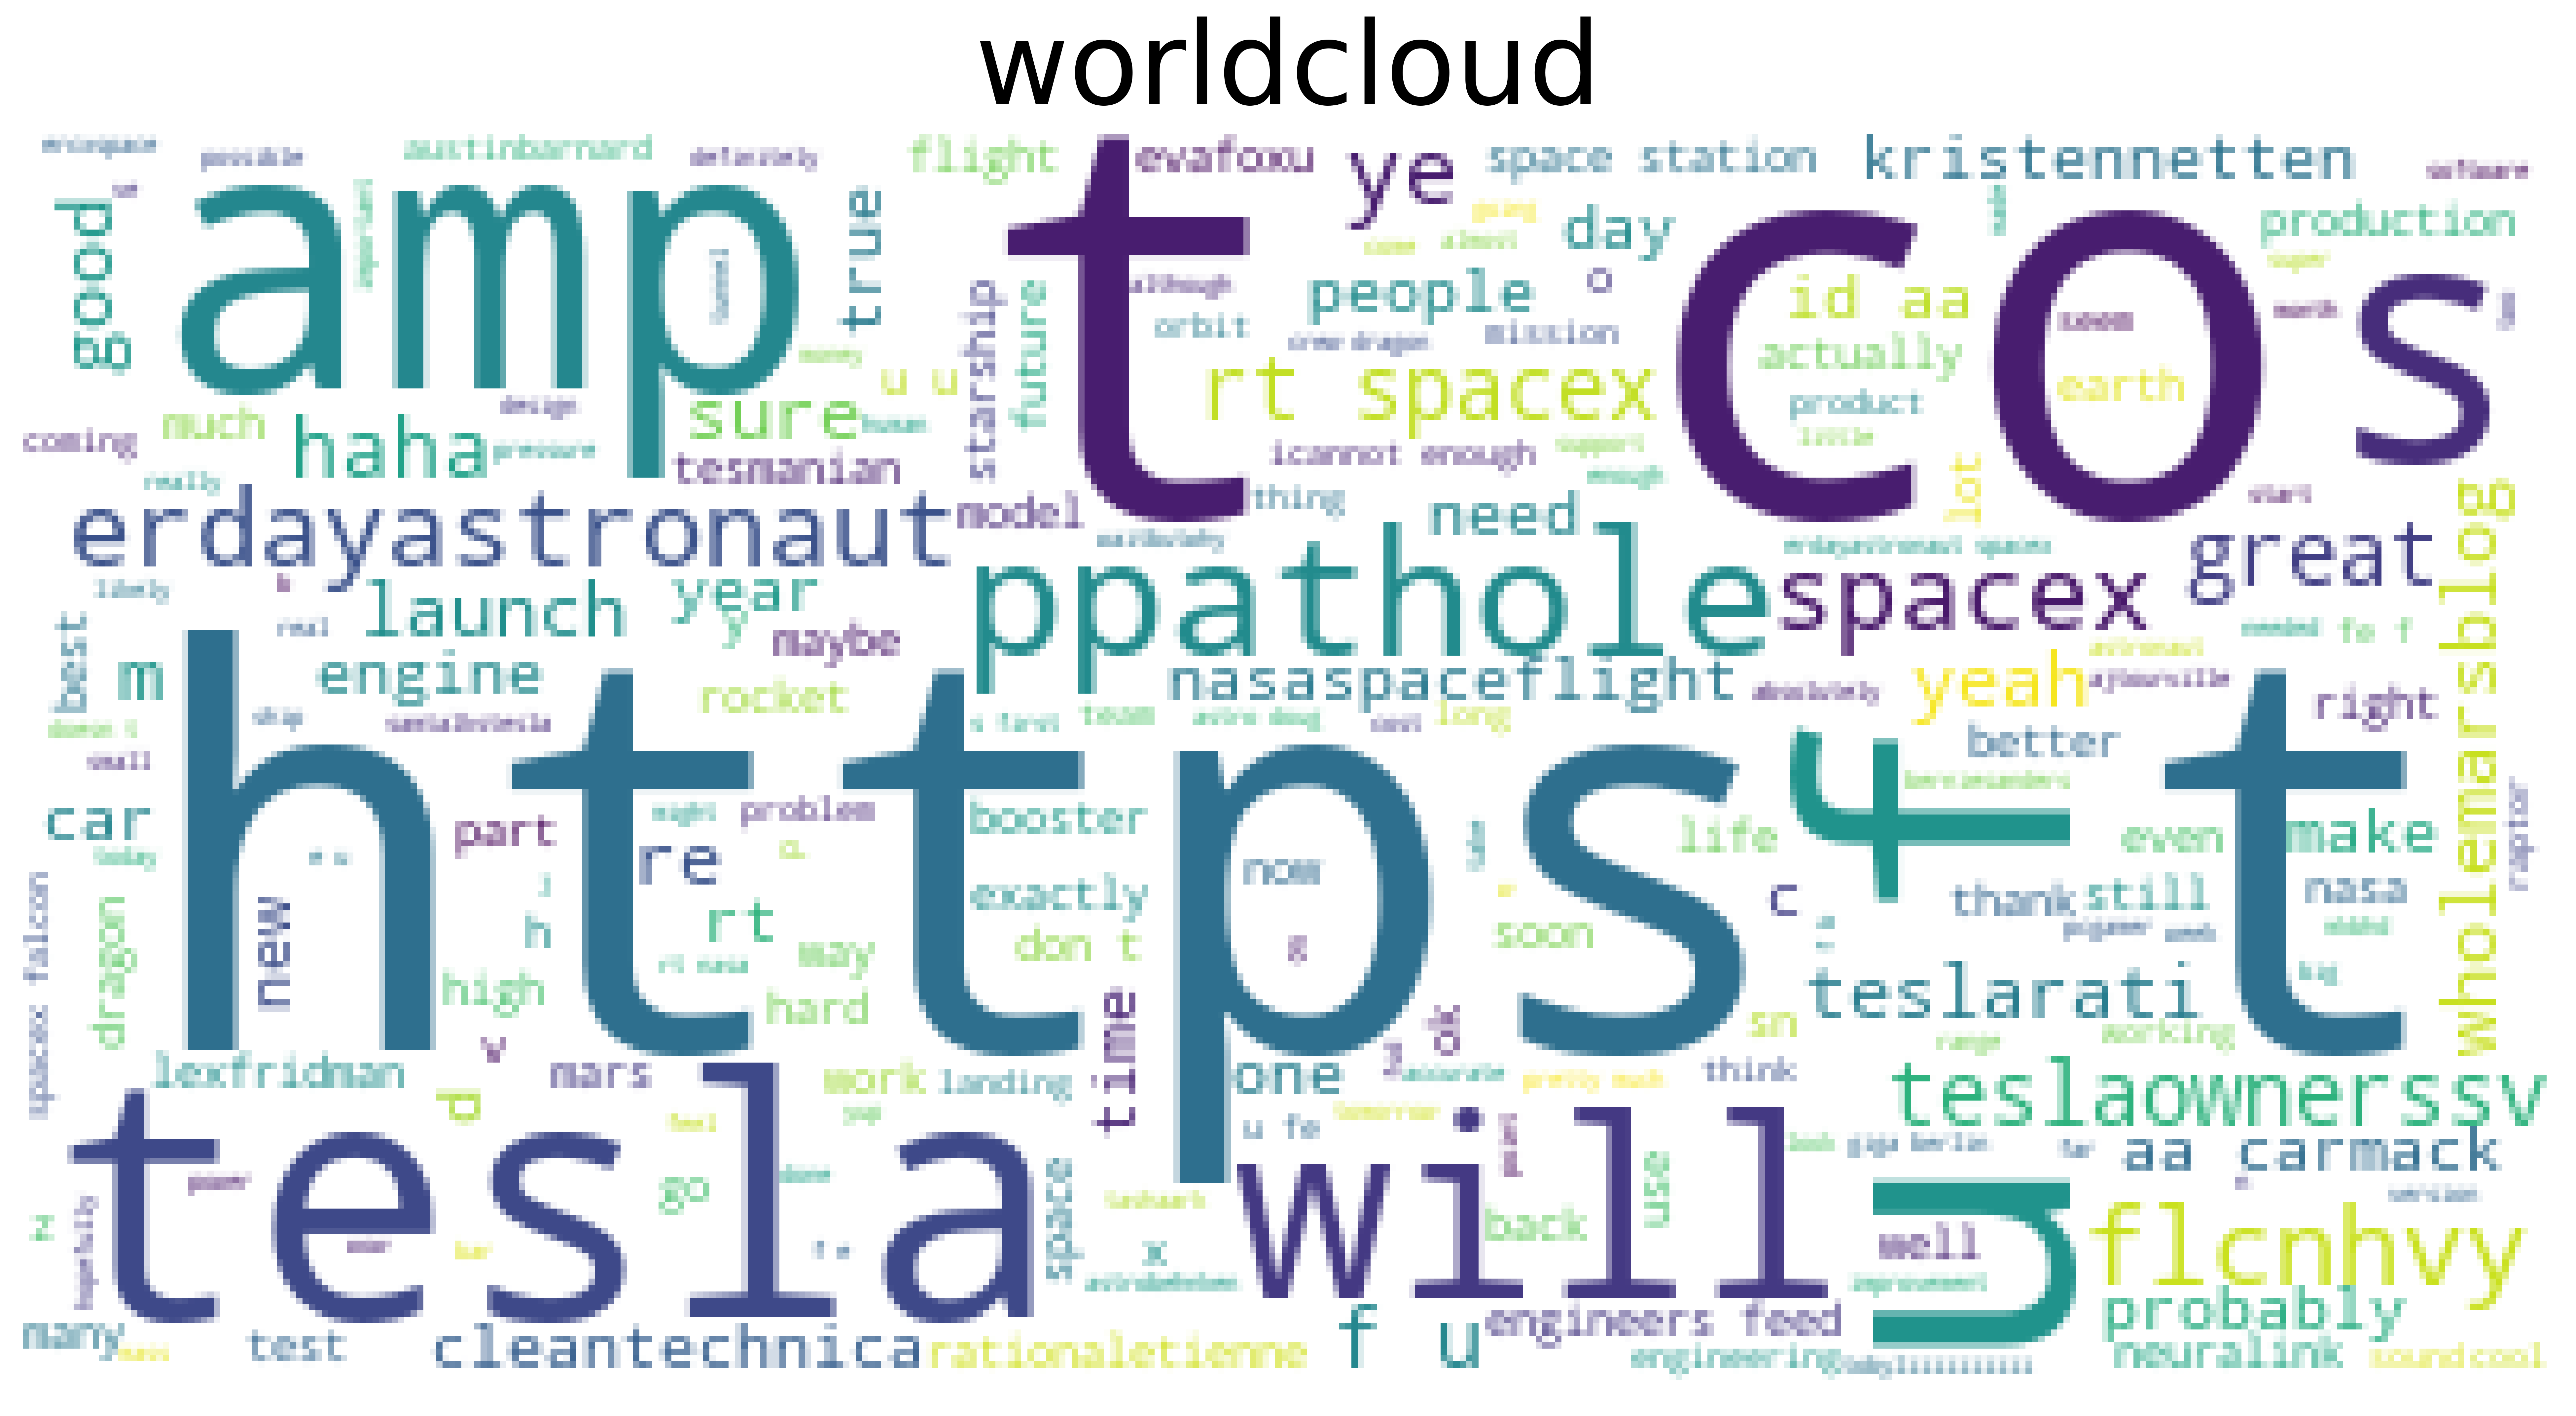

In [38]:
worldcloud(corpus)

## Performing Data Preprocesing

### Creating Bag Of Word's

In [6]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
cv.get_feature_names_out()

array(['aa', 'aayypcpp', 'ab', ..., 'zynsxisp', 'zz', 'zzcool'],
      dtype=object)

In [9]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,about,above,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating Tf-Idf

In [10]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf

<1999x5572 sparse matrix of type '<class 'numpy.float64'>'
	with 21701 stored elements in Compressed Sparse Row format>

In [11]:
tf.get_feature_names_out()

array(['aa', 'aayypcpp', 'ab', ..., 'zynsxisp', 'zz', 'zzcool'],
      dtype=object)

In [12]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,about,above,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.229847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
